## Generate Dataset, clustered and including ages

In [70]:
import pandas as pd
import numpy as np
import random

# Number of samples per cluster
num_samples_per_cluster = 200000

# Generate heights for five clusters
cluster1_heights = np.random.normal(loc=150, scale=2, size=num_samples_per_cluster).astype(int)
cluster2_heights = np.random.normal(loc=160, scale=2, size=num_samples_per_cluster).astype(int)
cluster3_heights = np.random.normal(loc=170, scale=2, size=num_samples_per_cluster).astype(int)
cluster4_heights = np.random.normal(loc=180, scale=2, size=num_samples_per_cluster).astype(int)
cluster5_heights = np.random.normal(loc=190, scale=2, size=num_samples_per_cluster).astype(int)

# Generate ages for five clusters
cluster1_ages = np.random.randint(18, 25, size=num_samples_per_cluster)
cluster2_ages = np.random.randint(25, 35, size=num_samples_per_cluster)
cluster3_ages = np.random.randint(35, 45, size=num_samples_per_cluster)
cluster4_ages = np.random.randint(45, 55, size=num_samples_per_cluster)
cluster5_ages = np.random.randint(55, 65, size=num_samples_per_cluster)

# Combine clusters
heights = np.concatenate([cluster1_heights, cluster2_heights, cluster3_heights, cluster4_heights, cluster5_heights])
ages = np.concatenate([cluster1_ages, cluster2_ages, cluster3_ages, cluster4_ages, cluster5_ages])

# Generate random eye colors
eye_colors = random.choices(['Blue', 'Brown', 'Green', 'Hazel'], k=5*num_samples_per_cluster)

# Generate T-shirt sizes based on height
def assign_tshirt_size(height):
    if height < 160:
        return 'S'
    elif height < 175:
        return 'M'
    else:
        return 'L'

tshirt_sizes = [assign_tshirt_size(height) for height in heights]

# Create a DataFrame
df = pd.DataFrame({
    'Height (cm)': heights,
    'Age': ages,
    'Eye Color': eye_colors,
    'T-Shirt Size': tshirt_sizes
})

# Save to CSV file
df.to_csv('student_tshirt_size_dataset_with_5_clusters_and_ages.csv', index=False)


df.sample(10)


,Height (cm),Age,Eye Color
695174,179,52,Green
612092,178,47,Brown
154141,148,24,Brown
716676,179,54,Hazel
598356,172,37,Hazel
555672,170,36,Green
565302,168,40,Hazel
257838,159,29,Blue
72565,151,20,Green
847830,191,61,Hazel


In [61]:
import pandas as pd
import numpy as np
import random

# Number of samples per cluster
num_samples_per_cluster = 200000

# Generate heights for five clusters
cluster_heights = [np.random.normal(loc=mean, scale=2, size=num_samples_per_cluster).astype(int) 
                   for mean in [150, 160, 170, 180, 190]]

# Generate ages for five clusters
cluster_ages = [np.random.randint(low, high, size=num_samples_per_cluster) 
                for low, high in [(18, 25), (25, 35), (35, 45), (45, 55), (55, 65)]]

# Combine clusters
heights = np.concatenate(cluster_heights)
ages = np.concatenate(cluster_ages)

# Shuffle ages to break correlation with heights
np.random.shuffle(ages)

# Generate random eye colors
eye_colors = random.choices(['Blue', 'Brown', 'Green', 'Hazel'], k=5*num_samples_per_cluster)

# Generate T-shirt sizes based on height
tshirt_sizes = ['S' if h < 160 else 'M' if h < 175 else 'L' for h in heights]

# Create a DataFrame
df = pd.DataFrame({
    'Height (cm)': heights,
    'Age': ages,
    'Eye Color': eye_colors,
    'T-Shirt Size': tshirt_sizes
})

# Save to CSV file
df.to_csv('student_tshirt_size_dataset_with_5_clusters_and_ages.csv', index=False)

# Display last 10 rows
print(df.tail(10))


        Height (cm)  Age Eye Color T-Shirt Size
999990          189   48     Hazel            L
999991          192   32     Green            L
999992          195   20     Hazel            L
999993          189   48     Hazel            L
999994          188   40     Green            L
999995          189   55      Blue            L
999996          191   49     Green            L
999997          192   49     Brown            L
999998          186   38     Brown            L
999999          188   44      Blue            L


## Let's chart distribution

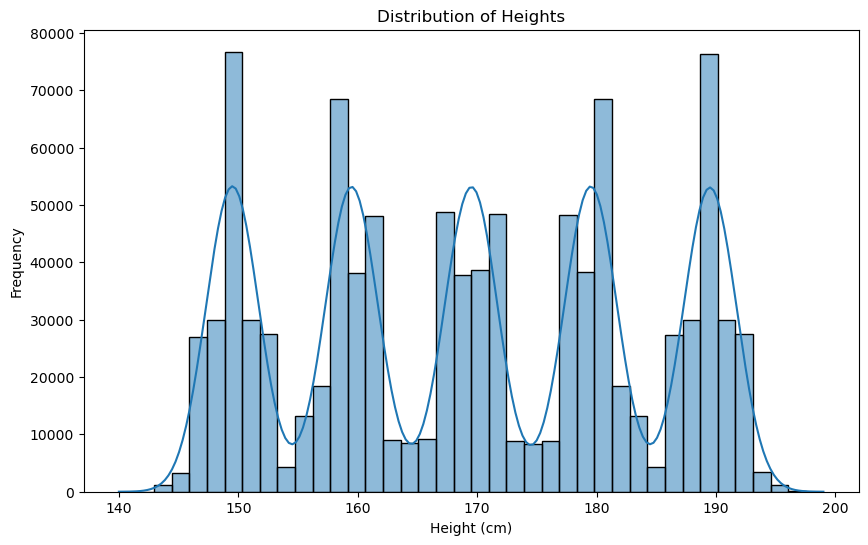

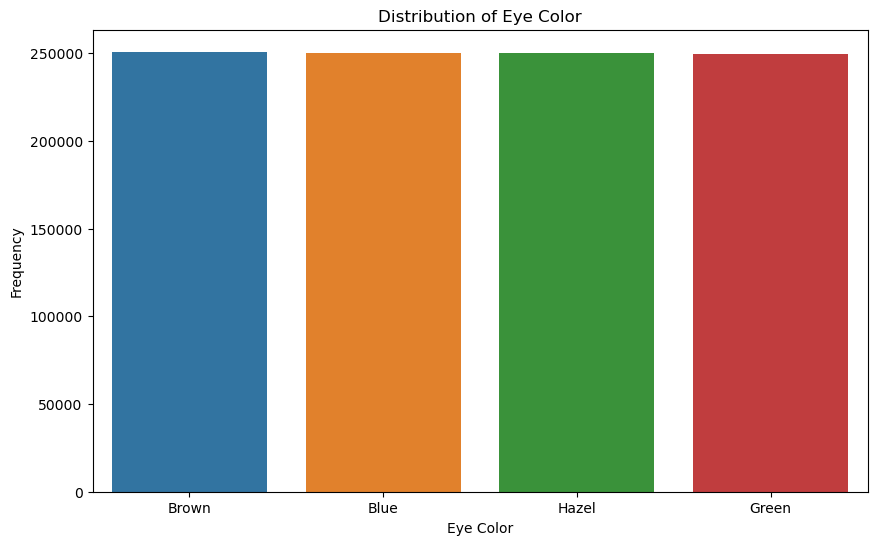

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of heights
plt.figure(figsize=(10, 6))
sns.histplot(df['Height (cm)'], bins=40, kde=True)
plt.title('Distribution of Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of eye color
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Eye Color', order=df['Eye Color'].value_counts().index)
plt.title('Distribution of Eye Color')
plt.xlabel('Eye Color')
plt.ylabel('Frequency')
plt.show()

## Lets chart modality of Height

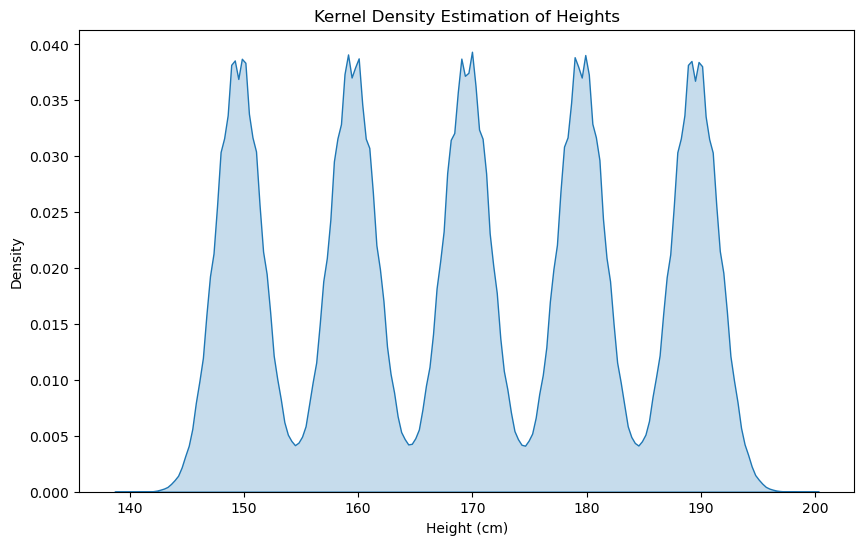

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the KDE plot for heights
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Height (cm)'], bw_adjust=0.5, fill=True)
plt.title('Kernel Density Estimation of Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.show()


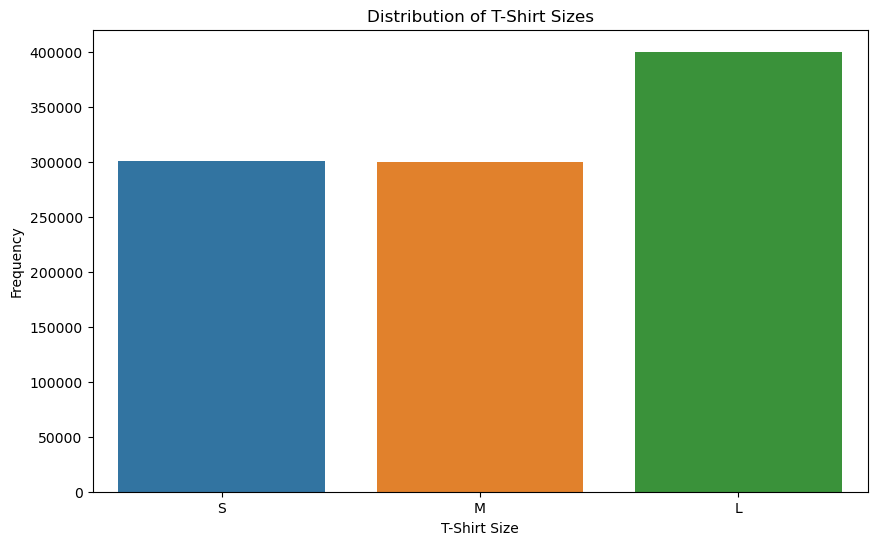

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the bar chart for T-shirt sizes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='T-Shirt Size', order=['S', 'M', 'L'])
plt.title('Distribution of T-Shirt Sizes')
plt.xlabel('T-Shirt Size')
plt.ylabel('Frequency')
plt.show()


### Mixed Modality Size and Height

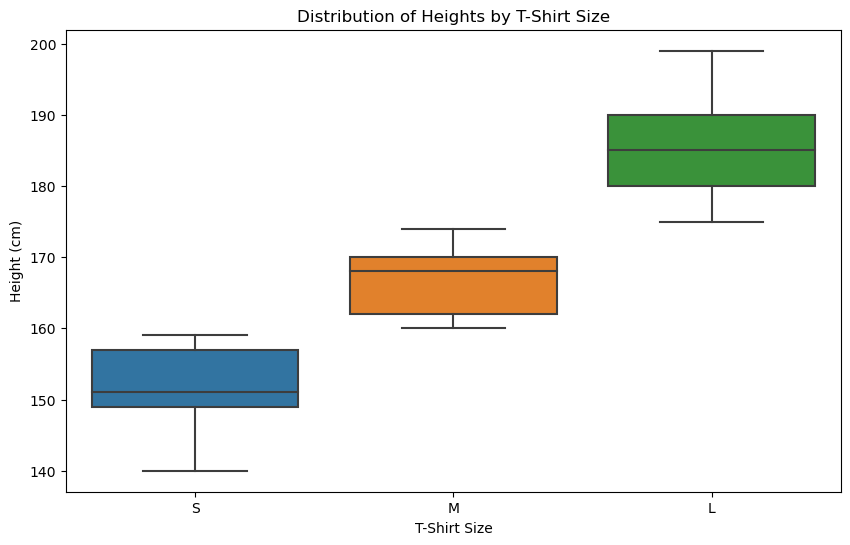

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='T-Shirt Size', y='Height (cm)', order=['S', 'M', 'L'])
plt.title('Distribution of Heights by T-Shirt Size')
plt.xlabel('T-Shirt Size')
plt.ylabel('Height (cm)')
plt.show()


### Mixed Modality between age and t-shirt size

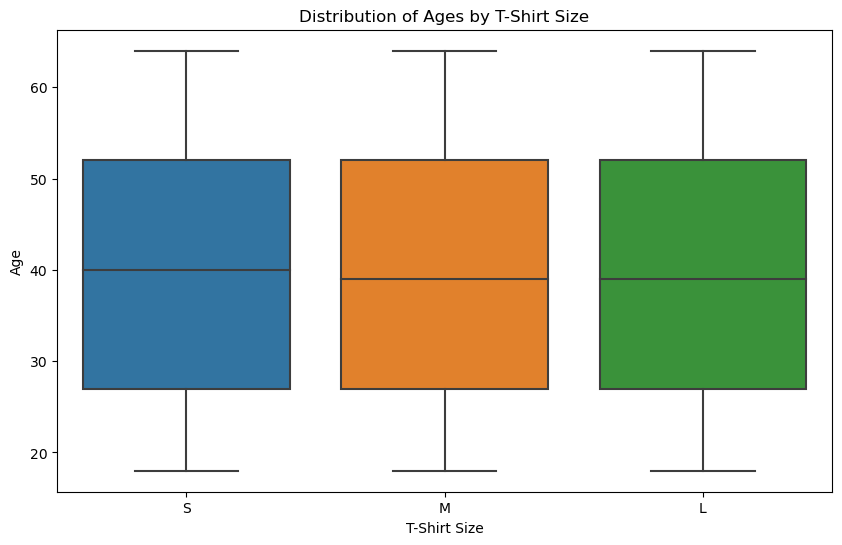

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#df = pd.read_csv('student_tshirt_size_dataset_with_5_clusters_and_ages.csv')

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='T-Shirt Size', y='Age', order=['S', 'M', 'L'])
plt.title('Distribution of Ages by T-Shirt Size')
plt.xlabel('T-Shirt Size')
plt.ylabel('Age')
plt.show()


### Full correlation chart

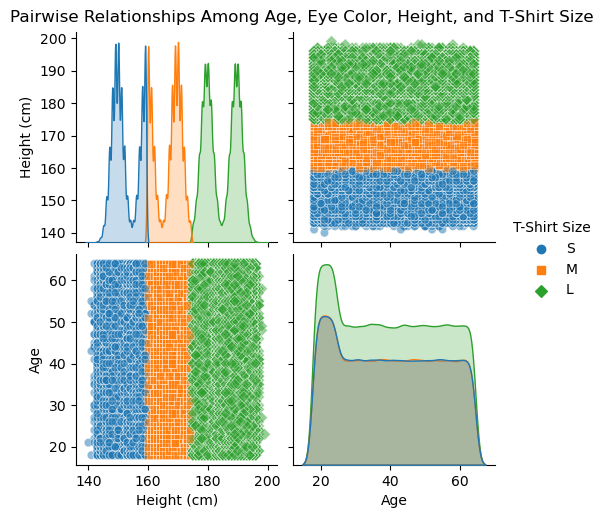

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
#df = pd.read_csv('student_tshirt_size_dataset_with_5_clusters_and_ages.csv')

# Create the scatter plot matrix (pairplot)
sns.pairplot(df, hue='T-Shirt Size', diag_kind='kde', markers=['o', 's', 'D'], plot_kws={'alpha': 0.5})
plt.suptitle('Pairwise Relationships Among Age, Eye Color, Height, and T-Shirt Size', y=1.02)
plt.show()


### Supervised Learning - TRAINING our model

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

print("Step 1: Loading the dataset...")
# Load the dataset
df = pd.read_csv('student_tshirt_size_dataset_with_5_clusters_and_ages.csv')

print("Step 2: Preprocessing the data...")
# Label encode the 'Eye Color' feature
label_encoder = LabelEncoder()
df['Eye Color'] = label_encoder.fit_transform(df['Eye Color'])

# Features and target variable
X = df[['Height (cm)', 'Eye Color', 'Age']]
y = df['T-Shirt Size']

print("Step 3: Splitting the data into training and test sets...")
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Step 4: Initializing the RandomForestClassifier...")
# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

print("Step 5: Training the model...")
# Train the model
clf.fit(X_train, y_train)

print("Step 6: Making predictions...")
# Make predictions
y_pred = clf.predict(X_test)

print("Step 7: Evaluating the model...")
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

print("Step 8: Experiment completed.")



Step 1: Loading the dataset...
Step 2: Preprocessing the data...
Step 3: Splitting the data into training and test sets...
Step 4: Initializing the RandomForestClassifier...
Step 5: Training the model...
Step 6: Making predictions...
Step 7: Evaluating the model...
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           L       1.00      1.00      1.00     80014
           M       1.00      1.00      1.00     59872
           S       1.00      1.00      1.00     60114

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000

Step 8: Experiment completed.


### (SUPERVISED) Inferences out of Labeled trained model

In [54]:
# Create 10 new data samples (Height, Eye Color, Age)
# Eye Color is label-encoded (e.g., Blue: 0, Brown: 1, Green: 2, Hazel: 3)
new_samples = np.array([
    [155, 0, 22],  # Sample 1
    [165, 1, 28],  # Sample 2
    [175, 2, 35],  # Sample 3
    [185, 3, 42],  # Sample 4
    [160, 1, 24],  # Sample 5
    [170, 2, 31],  # Sample 6
    [180, 0, 38],  # Sample 7
    [190, 3, 45],  # Sample 8
    [162, 2, 26],  # Sample 9
    [172, 1, 33]   # Sample 10
])

# Convert to DataFrame with feature names
new_samples_df = pd.DataFrame(new_samples, columns=['Height (cm)', 'Eye Color', 'Age'])

# Make predictions for the new samples
new_predictions = clf.predict(new_samples_df)

# Display the predictions along with features
for i, (features, pred) in enumerate(zip(new_samples_df.values, new_predictions), 1):
    height, eye_color, age = features
    eye_color_str = label_encoder.inverse_transform([eye_color])[0]  # Decode the label-encoded eye color
    print(f"Sample {i}: Features (Height: {height} cm, Eye Color: {eye_color_str}, Age: {age}) - Predicted T-Shirt Size = {pred}")


Sample 1: Features (Height: 155 cm, Eye Color: Blue, Age: 22) - Predicted T-Shirt Size = S
Sample 2: Features (Height: 165 cm, Eye Color: Brown, Age: 28) - Predicted T-Shirt Size = M
Sample 3: Features (Height: 175 cm, Eye Color: Green, Age: 35) - Predicted T-Shirt Size = L
Sample 4: Features (Height: 185 cm, Eye Color: Hazel, Age: 42) - Predicted T-Shirt Size = L
Sample 5: Features (Height: 160 cm, Eye Color: Brown, Age: 24) - Predicted T-Shirt Size = M
Sample 6: Features (Height: 170 cm, Eye Color: Green, Age: 31) - Predicted T-Shirt Size = M
Sample 7: Features (Height: 180 cm, Eye Color: Blue, Age: 38) - Predicted T-Shirt Size = L
Sample 8: Features (Height: 190 cm, Eye Color: Hazel, Age: 45) - Predicted T-Shirt Size = L
Sample 9: Features (Height: 162 cm, Eye Color: Green, Age: 26) - Predicted T-Shirt Size = M
Sample 10: Features (Height: 172 cm, Eye Color: Brown, Age: 33) - Predicted T-Shirt Size = M


### Unsupervised Training

Step 1: Loading the dataset...
Step 2: Preparing for k-means clustering...
Step 3: Fitting the model...
Step 4: Visualizing the clusters...


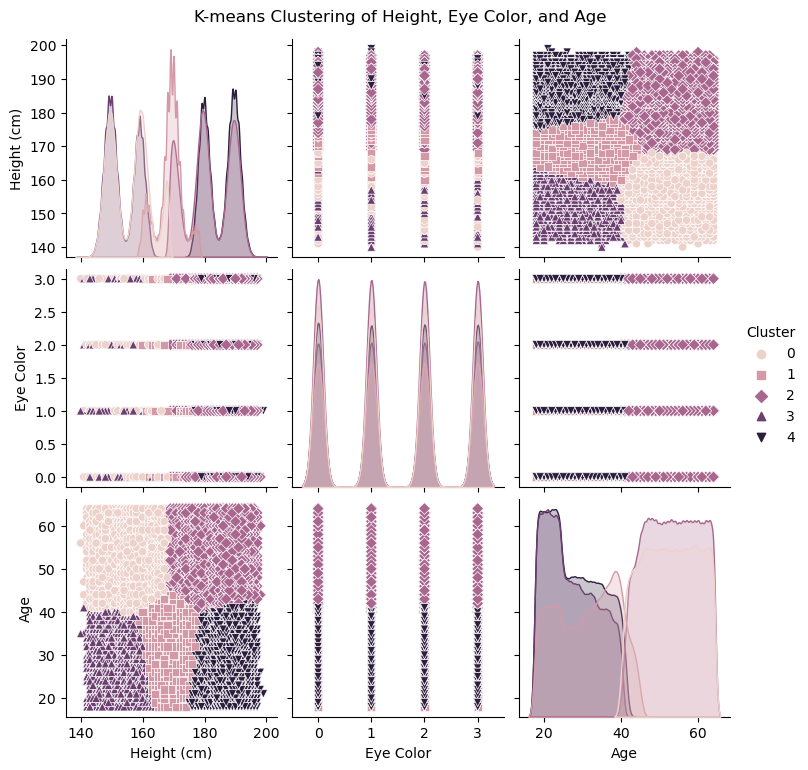

Step 5: Clustering completed.


In [55]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

print("Step 1: Loading the dataset...")
# Load the dataset
#df = pd.read_csv('student_tshirt_size_dataset_with_5_clusters_and_ages.csv')

# Label encode the 'Eye Color' feature
label_encoder = LabelEncoder()
df['Eye Color'] = label_encoder.fit_transform(df['Eye Color'])

print("Step 2: Preparing for k-means clustering...")
# Features for clustering
features = ['Height (cm)', 'Eye Color', 'Age']

# Initialize k-means (assuming 5 clusters)
kmeans = KMeans(n_clusters=5, random_state=42)

print("Step 3: Fitting the model...")
# Fit the model
kmeans.fit(df[features])

# Get cluster assignments for each data point
df['Cluster'] = kmeans.labels_

print("Step 4: Visualizing the clusters... (this may take some minutes...)")
# Visualize the clusters using pairplot
sns.pairplot(df, hue='Cluster', vars=features, diag_kind='kde', markers=['o', 's', 'D', '^', 'v'])
plt.suptitle('K-means Clustering of Height, Eye Color, and Age', y=1.02)
plt.show()

print("Step 5: Clustering completed.")


### (UNSUPERVISED) Clustering Inferences

In [56]:
print("Step 6: Making inferences on new data samples...")

# Create 10 new data samples (Height, Eye Color, Age)
# Eye Color is label-encoded (e.g., Blue: 0, Brown: 1, Green: 2, Hazel: 3)
new_samples = np.array([
    [155, 0, 22],  # Sample 1
    [165, 1, 28],  # Sample 2
    [175, 2, 35],  # Sample 3
    [185, 3, 42],  # Sample 4
    [160, 1, 24],  # Sample 5
    [170, 2, 31],  # Sample 6
    [180, 0, 38],  # Sample 7
    [190, 3, 45],  # Sample 8
    [162, 2, 26],  # Sample 9
    [172, 1, 33]   # Sample 10
])

# Convert to DataFrame with feature names
new_samples_df = pd.DataFrame(new_samples, columns=['Height (cm)', 'Eye Color', 'Age'])

# Make cluster predictions for the new samples
new_clusters = kmeans.predict(new_samples_df)

# Display the cluster assignments along with features
for i, (features, cluster) in enumerate(zip(new_samples_df.values, new_clusters), 1):
    height, eye_color, age = features
    eye_color_str = label_encoder.inverse_transform([eye_color])[0]  # Decode the label-encoded eye color
    print(f"Sample {i}: Features (Height: {height} cm, Eye Color: {eye_color_str}, Age: {age}) - Assigned Cluster = {cluster}")

print("Step 7: Inference completed.")


Step 6: Making inferences on new data samples...
Sample 1: Features (Height: 155 cm, Eye Color: 0, Age: 22) - Assigned Cluster = 3
Sample 2: Features (Height: 165 cm, Eye Color: 1, Age: 28) - Assigned Cluster = 1
Sample 3: Features (Height: 175 cm, Eye Color: 2, Age: 35) - Assigned Cluster = 1
Sample 4: Features (Height: 185 cm, Eye Color: 3, Age: 42) - Assigned Cluster = 2
Sample 5: Features (Height: 160 cm, Eye Color: 1, Age: 24) - Assigned Cluster = 3
Sample 6: Features (Height: 170 cm, Eye Color: 2, Age: 31) - Assigned Cluster = 1
Sample 7: Features (Height: 180 cm, Eye Color: 0, Age: 38) - Assigned Cluster = 4
Sample 8: Features (Height: 190 cm, Eye Color: 3, Age: 45) - Assigned Cluster = 2
Sample 9: Features (Height: 162 cm, Eye Color: 2, Age: 26) - Assigned Cluster = 1
Sample 10: Features (Height: 172 cm, Eye Color: 1, Age: 33) - Assigned Cluster = 1
Step 7: Inference completed.
